###Project Summary
<!-- <img src ='https://images.unsplash.com/photo-1556740772-1a741367b93e?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=2700&q=80' width="800" height = "200"> --> 
<!-- Image courtesy of Blake Wisz" -->
######Ivy(Ruxin) Tong | Dec 9th, 2020

####Kaggle Content (from Kaggle Website):
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

####**Objective** : Classify 2627 customers into 4 existing groups (A,B,C,D)






####**Datasets** : Test.csv | Train.csv (from Kaggle) 
######***About the train data***

| Variable   | Definition  | Description |
|-----------------  |---------------|---------------|
| ID    | Unique ID |  |
| Gender  | Gender of the customer | Binary |
| Ever_Married | Marital Status of the customer | Binary |
| Age | Age of the customer | Range from 18 to 89|
| Graduated | Is the customer a graduate | Binary |
| Profession | Profession of the customer |  9 types of Profession|
| Work_Experience | Work experience in years |Range from 0 to 14 years |
| Spending_Score | Spending score of the customer | low, avg, and high|
| Family_Size | Number of family memebers for the customer (including her/himself) | Range from 1 to 9|
| Var_1| Anonymized category for the customer | 7 types|
| Segmentation | Target customer segmentation | 4 Groups : A, B, C, D|

######***Acknowledgement***  Datasets were downloaded from Kaggle website: 
                              https://www.kaggle.com/vetrirah/customer 
                              https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement
                              
                            



####**Conclusion**:   
I used Random Forest (best model with accuracy score around 54%), KNN, Light GBM to train models. 

I tried to 1): use MinMaxScaler on age, work_experience and family_size with other categorical variables to build model and 2): bin age, work_experience and family_size and together with other categorical variables to build model.This notebook used the variable binning. Segmentation A and B shared similar customer attributes, and their classification accuracy score were relatively low. 

There's a data leak in the dataset, around 88.8% Ids were the same in train and test set. Their features were similar with a minor difference. Top-scorers were able to achieve higher scores by matching ids. However, I decided not to do it for 2 reasons 1): building models based on unique features such as IDs are not recommended 2): Having 88.8% repeated ids in the new market does not make sense, and we should not build models based on ids to . If this is a real-life example, i will discuss with relevant stakeholders about this question before moving forward. 

  
I also learnt about data leakage concept for the first time. 

Stay tuned to my future projects :)

#### Analysis
  - Load Packages

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
pd.set_option('display.float_format', lambda x : '%0.2f' %x)
%matplotlib inline

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV


- Read Data

In [0]:
train = spark.read.csv("/FileStore/tables/Train.csv", header= True, inferSchema = True).toPandas()
print("train dataset head: ")
train.head()

train dataset head: 
Out[224]:

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,nan,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,nan,High,6.00,Cat_6,A


In [0]:
test = spark.read.csv("/FileStore/tables/Test.csv", header= True, inferSchema = True).toPandas()
print("test dataset head: ")
test.head()

test dataset head: 
Out[225]:

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.00,Low,1.00,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.00,Average,4.00,Cat_6
2,458996,Female,Yes,69,No,None,0.00,Low,1.00,Cat_6
3,459000,Male,Yes,59,No,Executive,11.00,High,2.00,Cat_6
4,459001,Female,No,19,No,Marketing,nan,Low,4.00,Cat_6


- Understand train dataset

In [0]:
print("Train dataset: ")
print("Number of Rows: " + str(train.shape[0]))
print("Number of Columns: " + str(train.shape[1]))
display(train.info())

Train dataset: 
Number of Rows: 8068
Number of Columns: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 8068 non-null int32 
 1 Gender 8068 non-null object 
 2 Ever_Married 7928 non-null object 
 3 Age 8068 non-null int32 
 4 Graduated 7990 non-null object 
 5 Profession 7944 non-null object 
 6 Work_Experience 7239 non-null float64
 7 Spending_Score 8068 non-null object 
 8 Family_Size 7733 non-null float64
 9 Var_1 7992 non-null object 
 10 Segmentation 8068 non-null object 
dtypes: float64(2), int32(2), object(7)
memory usage: 630.4+ KB

- Any Duplicate data?

In [0]:
print('There are', train.duplicated().sum() , "duplicate value(s) on the train dataset")

There are 0 duplicate value(s) on the train dataset

- No Duplicate Values

- Any Missing Values?

In [0]:
# Missing Values in train dataset
print("Train dataset missing value(s):  ")
print(train.isna().sum().sort_values(ascending = False))  # number

print("Train dataset missing value(s) percentage:  ")
((train.isna().sum()/len(train))*100).sort_values(ascending = False) # percentage


Train dataset missing value(s): 
Work_Experience 829
Family_Size 335
Ever_Married 140
Profession 124
Graduated 78
Var_1 76
Segmentation 0
Spending_Score 0
Age 0
Gender 0
ID 0
dtype: int64
Train dataset missing value(s) percentage: 
Out[228]: Work_Experience 10.28
Family_Size 4.15
Ever_Married 1.74
Profession 1.54
Graduated 0.97
Var_1 0.94
Segmentation 0.00
Spending_Score 0.00
Age 0.00
Gender 0.00
ID 0.00
dtype: float64

-  Yes. 10.3% of work experience has missing values. Family_Size, Ever_Married, Profession, Graduated, and Var_1 have missing values as well
    -  Need to decide how to perform data imputation

- Understand Test dataset

In [0]:
print("test dataset: ")
print(test.shape)
display(test.info())

test dataset: 
(2627, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 2627 non-null int32 
 1 Gender 2627 non-null object 
 2 Ever_Married 2577 non-null object 
 3 Age 2627 non-null int32 
 4 Graduated 2603 non-null object 
 5 Profession 2589 non-null object 
 6 Work_Experience 2358 non-null float64
 7 Spending_Score 2627 non-null object 
 8 Family_Size 2514 non-null float64
 9 Var_1 2595 non-null object 
dtypes: float64(2), int32(2), object(6)
memory usage: 184.8+ KB

In [0]:
# test categorical variable
for i in test.select_dtypes("object").columns:
  print(test.groupby(i).count()[["ID"]]/test[i].count())
  print(" ")

ID
Gender 
Female 0.46
Male 0.54
 
 ID
Ever_Married 
No 0.41
Yes 0.59
 
 ID
Graduated 
No 0.38
Yes 0.62
 
 ID
Profession 
Artist 0.31
Doctor 0.09
Engineer 0.09
Entertainment 0.12
Executive 0.07
Healthcare 0.16
Homemaker 0.03
Lawyer 0.09
Marketing 0.04
 
 ID
Spending_Score 
Average 0.24
High 0.15
Low 0.62
 
 ID
Var_1 
Cat_1 0.01
Cat_2 0.05
Cat_3 0.10
Cat_4 0.15
Cat_5 0.01
Cat_6 0.64
Cat_7 0.03

In [0]:
print('There are', test.duplicated().sum() , "duplicate value(s) on the test dataset")

There are 0 duplicate value(s) on the test dataset

In [0]:
# Missing values im test dataset
print("Test dataset missing value:  ")
print(test.isna().sum().sort_values(ascending = False))  # number
print("Test dataset missing value(s) percentage:  ")
((test.isna().sum()/len(test))*100).sort_values(ascending = False) # percentage


Test dataset missing value: 
Work_Experience 269
Family_Size 113
Ever_Married 50
Profession 38
Var_1 32
Graduated 24
Spending_Score 0
Age 0
Gender 0
ID 0
dtype: int64
Test dataset missing value(s) percentage: 
Out[232]: Work_Experience 10.24
Family_Size 4.30
Ever_Married 1.90
Profession 1.45
Var_1 1.22
Graduated 0.91
Spending_Score 0.00
Age 0.00
Gender 0.00
ID 0.00
dtype: float64

- Relationship between train and test dataset

In [0]:
train.ID.isin(test.ID).sum()/test.shape[0]

Out[233]: 0.8877046060144652

- 89% of the test dataset share the same ID with train dataset? need investigation

In [0]:
train.ID[train.ID.isin(test.ID)]

Out[234]: 1 462643
2 466315
4 462669
5 461319
9 465176
 ... 
8053 465667
8054 463437
8056 459889
8061 465231
8064 464685
Name: ID, Length: 2332, dtype: int32

In [0]:
#let's take 461319 as an example

In [0]:
test[test.ID==461319]

Out[236]:

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
711,461319,Male,Yes,58,No,Artist,0.00,Average,2.00,Cat_6


In [0]:
train[train.ID==461319]

Out[237]:

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5,461319,Male,Yes,56,No,Artist,0.00,Average,2.00,Cat_6,C


- Similar info except age

In [0]:
test[test.ID==459889]

Out[238]:

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
280,459889,Male,Yes,59,Yes,Homemaker,9.00,Average,3.00,Cat_6


In [0]:
train[train.ID==459889]

Out[239]:

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8056,459889,Male,Yes,63,Yes,Homemaker,8.00,Average,3.00,Cat_6,B


Conclusion: Although some customers have the same ID, I would assume that they represent different customers. Having 88% of existing customers in new auto markets doesn't make sense to me, so I will treat them as independent.

- Imputation
     - use relevant attributes for data imputation

In [0]:
train['is_train'] = 1
test['is_train'] = 0
combined = pd.concat([train,test])

- Ever-Married?

In [0]:
# with age. As can be seem, starting at age 35, more married people
married_age = pd.crosstab(index=train["Ever_Married"], 
                            columns=train["Age"],
                             margins =True)   # Include row and column totals

married_age/married_age.loc["All"]


Out[241]:

Age,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,All
Ever_Married,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.97,0.97,0.98,0.97,0.95,0.98,0.77,0.78,0.75,0.74,0.75,0.74,0.78,0.77,0.78,0.37,0.40,0.35,0.40,0.39,0.38,0.38,0.40,0.38,0.18,0.16,0.16,0.19,0.19,0.12,0.17,0.16,0.21,0.11,0.06,0.05,0.03,0.16,0.05,0.07,0.08,0.13,0.06,0.03,0.09,0.06,0.03,0.06,0.04,0.09,0.06,0.00,0.06,0.04,0.03,0.03,0.03,0.00,0.02,0.06,0.03,0.03,0.10,0.07,0.07,0.00,0.09,0.41
Yes,0.03,0.03,0.02,0.03,0.05,0.02,0.23,0.22,0.25,0.26,0.25,0.26,0.22,0.23,0.22,0.63,0.60,0.65,0.60,0.61,0.62,0.62,0.60,0.62,0.82,0.84,0.84,0.81,0.81,0.88,0.83,0.84,0.79,0.89,0.94,0.95,0.97,0.84,0.95,0.93,0.92,0.87,0.94,0.97,0.91,0.94,0.97,0.94,0.96,0.91,0.94,1.00,0.94,0.96,0.97,0.97,0.97,1.00,0.98,0.94,0.97,0.97,0.90,0.93,0.93,1.00,0.91,0.59
All,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [0]:
#result
combined.loc[(pd.isnull(combined["Ever_Married"])) & (combined['Age'] > 35),"Ever_Married"] = 'Yes'

In [0]:
# single consumers tend to have low spending_score
married_score = pd.crosstab(index=train["Ever_Married"], 
                            columns=train["Spending_Score"],
                             margins =True)   # Include row and column totals
married_score/married_score.loc["All"]


Out[243]:

Spending_Score,Average,High,Low,All
Ever_Married,,,,
No,0.00,0.00,0.68,0.41
Yes,1.00,1.00,0.32,0.59
All,1.00,1.00,1.00,1.00


In [0]:
#result
combined.loc[(pd.isnull(combined["Ever_Married"])) & ((combined['Spending_Score'] == 'Average') | (combined['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
combined.loc[(pd.isnull(combined["Ever_Married"])) & ((combined['Spending_Score'] == 'Low')),"Ever_Married"] = 'No'

In [0]:
# Married & graduation Relationship
married_profession = pd.crosstab(index=train["Ever_Married"], 
                            columns=train["Profession"],
                             margins =True)   # Include row and column totals

married_profession/married_profession.loc["All"]

Out[245]:

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,All
Ever_Married,,,,,,,,,,
No,0.29,0.54,0.39,0.38,0.06,0.89,0.47,0.07,0.66,0.41
Yes,0.71,0.46,0.61,0.62,0.94,0.11,0.53,0.93,0.34,0.59
All,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [0]:
#result
combined.loc[(pd.isnull(combined["Ever_Married"])) & ((combined['Profession'] == 'Lawyer') | (combined['Profession'] == 'Executive') | (combined['Profession'] == 'Artist')),"Ever_Married"] = 'Yes'
combined.loc[(pd.isnull(combined["Ever_Married"])) & ((combined['Profession'] == 'Healthcare')),"Ever_Married"] = 'No'

In [0]:
print(combined['Ever_Married'].isna().sum())

0

- Family_Size

In [0]:
# family size and var_1
size_var_1 = pd.crosstab(index=train["Var_1"], 
                            columns=train["Family_Size"],
                             margins =True)   # Include row and column totals

size_var_1
size_var_1/size_var_1.loc["All"]


Out[248]:

Family_Size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
Var_1,,,,,,,,,,
Cat_1,0.01,0.02,0.02,0.02,0.02,0.03,0.01,0.00,0.00,0.02
Cat_2,0.03,0.04,0.05,0.08,0.10,0.08,0.14,0.02,0.02,0.05
Cat_3,0.10,0.08,0.11,0.11,0.10,0.12,0.09,0.06,0.05,0.10
Cat_4,0.10,0.10,0.12,0.14,0.23,0.28,0.36,0.56,0.43,0.13
Cat_5,0.01,0.01,0.01,0.01,0.01,0.03,0.03,0.04,0.05,0.01
Cat_6,0.72,0.74,0.66,0.61,0.50,0.42,0.31,0.26,0.39,0.66
Cat_7,0.02,0.02,0.03,0.03,0.03,0.04,0.05,0.06,0.07,0.03
All,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [0]:
# # result
combined.loc[ (pd.isnull(combined["Family_Size"])) & (combined['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0

In [0]:
combined['Family_Size'].fillna(combined['Family_Size'].mode()[0], inplace=True)
print(combined['Family_Size'].isna().sum())

0

- Profession

In [0]:
# From previous information, relationship between Profession and ever married.
combined.loc[(pd.isnull(combined["Profession"])) & ((combined["Ever_Married"] == 'No')), "Profession"] = "Healthcare"
combined.loc[(pd.isnull(combined["Profession"])) & ((combined["Ever_Married"] == 'Yes')), "Profession"] = "Executive"

In [0]:
# Profession and spending_score
profession_score = pd.crosstab(index=train["Spending_Score"], 
                            columns=train["Profession"],
                             margins =True)   # Include row and column totals

profession_score
profession_score/profession_score.loc["All"]

Out[252]:

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,All
Spending_Score,,,,,,,,,,
Average,0.40,0.26,0.32,0.34,0.13,0.03,0.24,0.03,0.06,0.24
High,0.10,0.05,0.09,0.05,0.66,0.03,0.11,0.52,0.11,0.15
Low,0.50,0.70,0.60,0.62,0.21,0.93,0.65,0.45,0.83,0.60
All,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [0]:
#result
combined.loc[(pd.isnull(combined["Profession"])) & ((combined["Spending_Score"] == 'High')), "Profession"] = "Executive"
combined.loc[(pd.isnull(combined["Profession"])) & ((combined["Spending_Score"] == 'Low')), "Profession"] = "Healthcare"

In [0]:
print(combined['Profession'].isna().sum())

0

- Graduated/Var_1/Work_Experience

In [0]:
graduated_age = pd.crosstab(index=train["Graduated"], 
                            columns=train["Age"],
                             margins =True)   # Include row and column totals

graduated_age
graduated_age/graduated_age.loc["All"]

#result
combined.loc[(pd.isnull(combined["Graduated"])) & ((combined['Age'] >35)),"Graduated"] = 'Yes'

In [0]:
for i in ["Var_1","Graduated","Work_Experience"]:
  combined[i].fillna(combined[i].mode()[0], inplace=True)
  print(combined[i].isna().sum())
  

0
0
0

In [0]:
train = combined[combined["is_train"]==1].drop("is_train",1)
test = combined[combined["is_train"]==0].drop("is_train",1)


- Basic Visualization

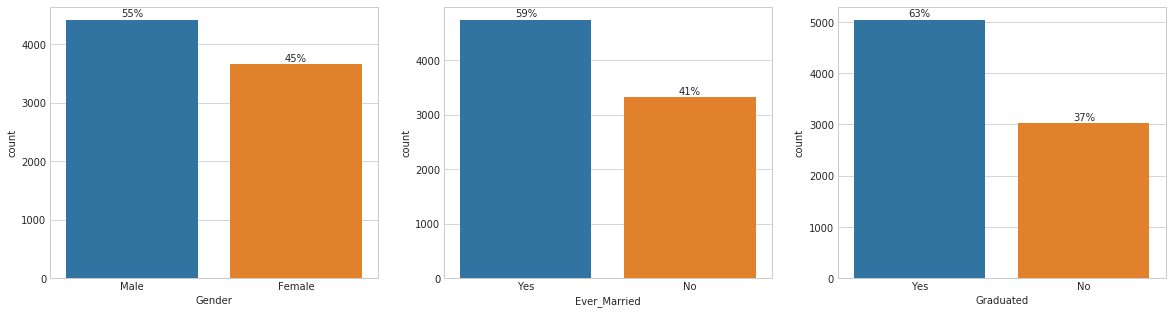

In [0]:
# Basic Visualization to understand data/each variable
object_col =train.select_dtypes("object")


# binary
fig, ax = plt.subplots(1,3, figsize=(20,5))

for i, variable in enumerate(["Gender","Ever_Married","Graduated"]):
  sns.countplot(x=variable, data=object_col, order = object_col[variable].value_counts().index, ax = ax[i])
  total  = len(object_col[variable])
  for p in ax[i].patches:
    percentage = f'{100 * p.get_height() / total:.0f}%\n'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[i].annotate(percentage, (x, y), ha='center', va='center')



- There's higher percentage of male/married/graduated consumers in the dataset

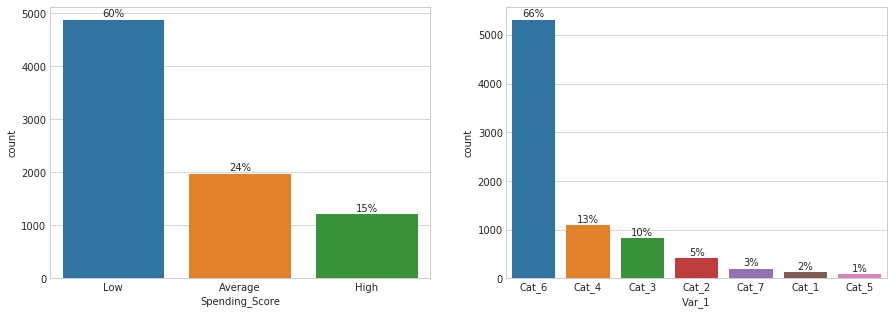

In [0]:
# variables with multiple levels
fig, ax = fig, ax = plt.subplots(1,2, figsize=(15,5))

for i, variable in enumerate(["Spending_Score","Var_1"]):
  sns.countplot(x=variable, data=object_col, order = object_col[variable].value_counts().index, ax=ax[i])
  total  = len(object_col[variable])
  for p in ax[i].patches:
    percentage = f'{100 * p.get_height() / total:.0f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax[i].annotate(percentage, (x, y), ha='center', va='center')
    


- Most consumers have lower average spending_score. and Cat_6 is the most typical type of Var_1

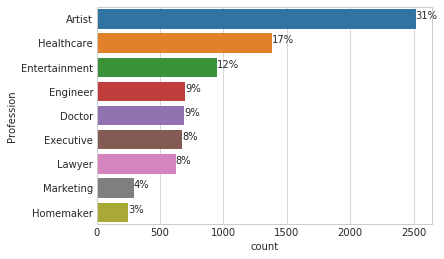

In [0]:
ax = sns.countplot(y='Profession', data=object_col,order = object_col['Profession'].value_counts().index)
total = len(object_col['Profession'])
for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.015
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

- Majority of consumers are artists(31%) and healthcare professionals(17%)

In [0]:
train.select_dtypes(["float64", "int32"]).describe()

Out[261]:

,ID,Age,Work_Experience,Family_Size
count,8068.00,8068.00,8068.00,8068.00
mean,463479.21,43.47,2.47,2.81
std,2595.38,16.71,3.27,1.51
min,458982.00,18.00,0.00,1.00
25%,461240.75,30.00,0.00,2.00
50%,463472.50,40.00,1.00,2.00
75%,465744.25,53.00,4.00,4.00
max,467974.00,89.00,14.00,9.00


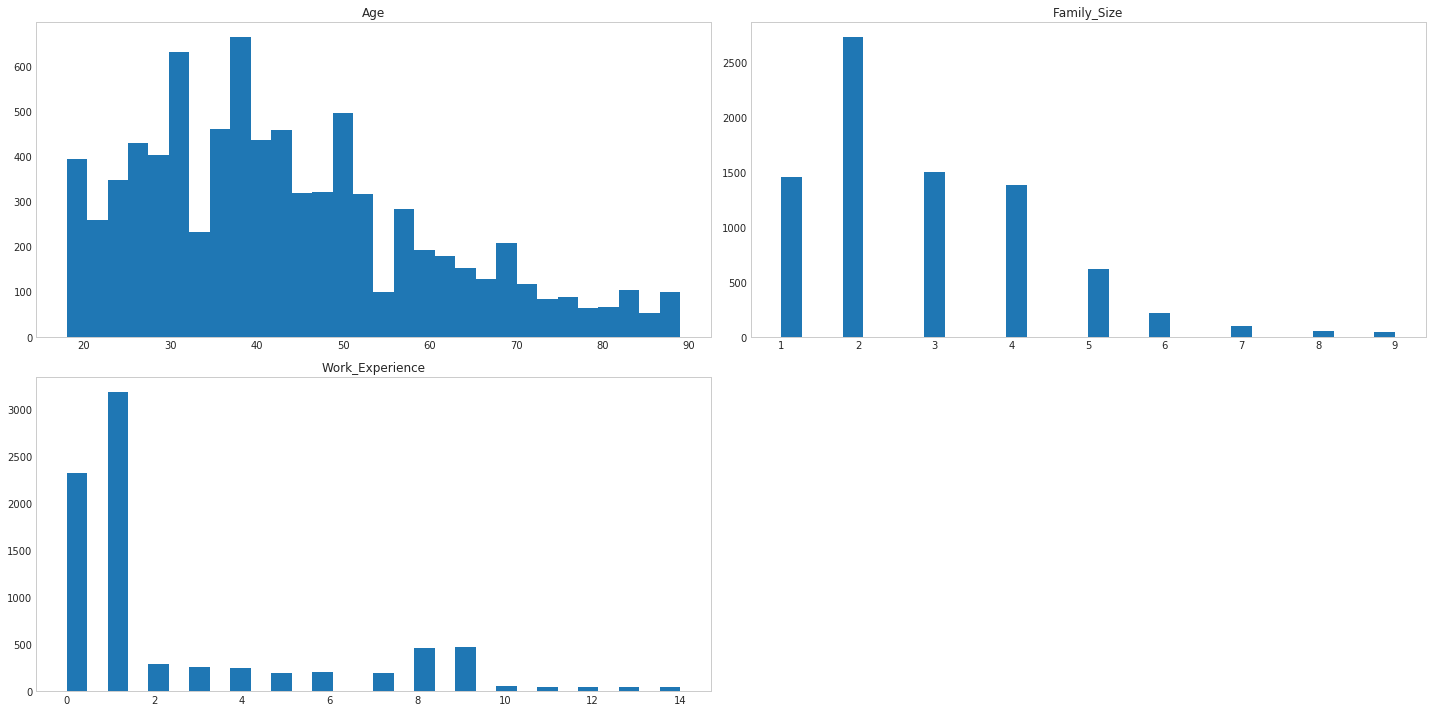

In [0]:
train.drop("ID",axis = 1).hist(bins=30,figsize=(20,10),grid=False)
plt.tight_layout()
plt.show()

- Most consumers have family size of 2 and less than 2 years work experience. 
    - Large range of age, but most consumers are between 20 to 50 years old

- Visualization of Label Variable

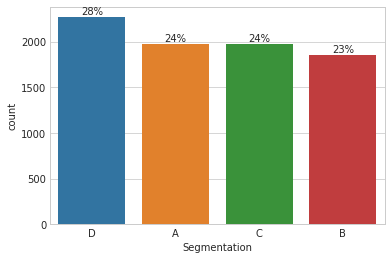

In [0]:
# Result shows it's a balanced

ax = sns.countplot(x="Segmentation", data= train, order = train["Segmentation"].value_counts().index)  
for p in ax.patches:
    total = len(train["Segmentation"])
    percentage = f'{100 * p.get_height() / total:.0f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')



- Visualization - Features and Labels Relationship

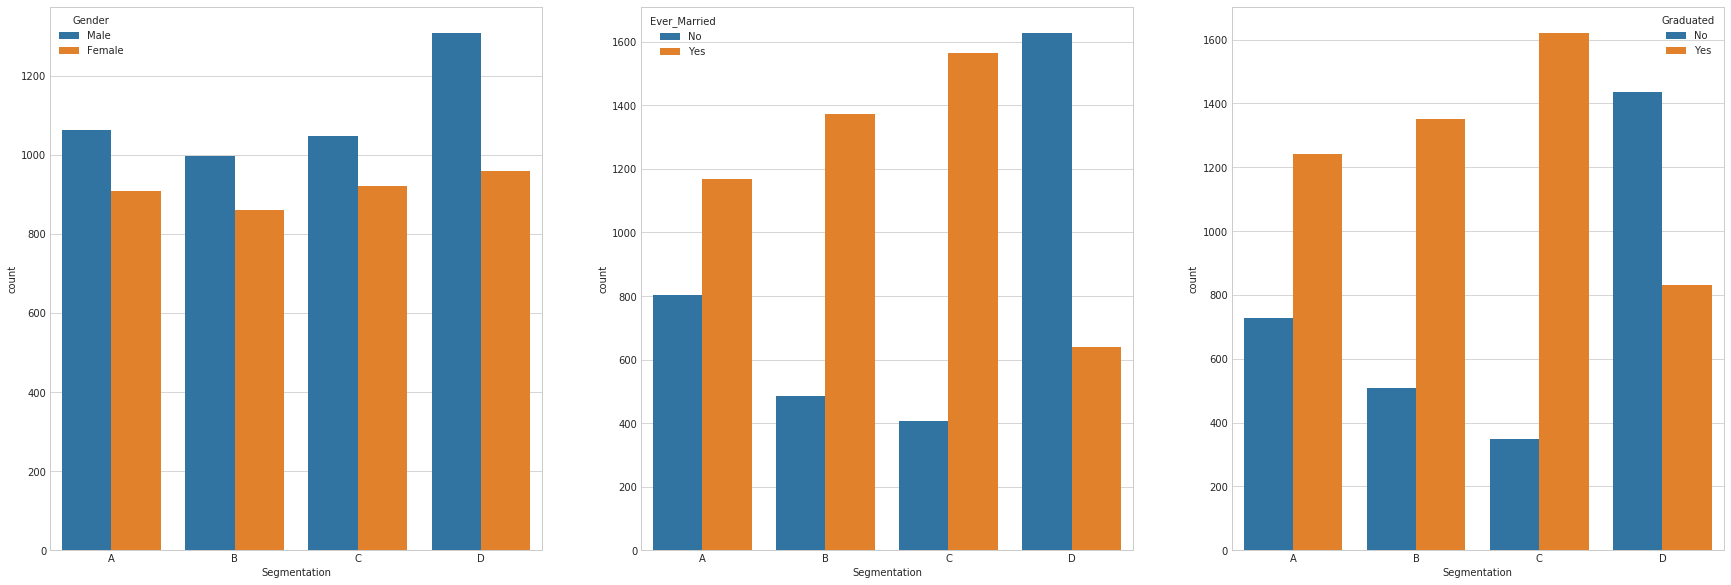

In [0]:
# features and label visualization
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i, variable in enumerate(["Gender","Ever_Married","Graduated"]):
    sns.countplot(x="Segmentation", data=object_col, order= ["A","B","C","D"], hue =variable , ax = ax[i])
    
    
# It seems that there'is a high percentage of non-married is classified as segmentation D.

-  In all segments, male are more than female. In segment D, the ratio of male v.s. female is the highest
    -  Segment D has more single than married consumers, while the other three groups display the inverse trend
    -  Majority of Segment D customers are not graduated

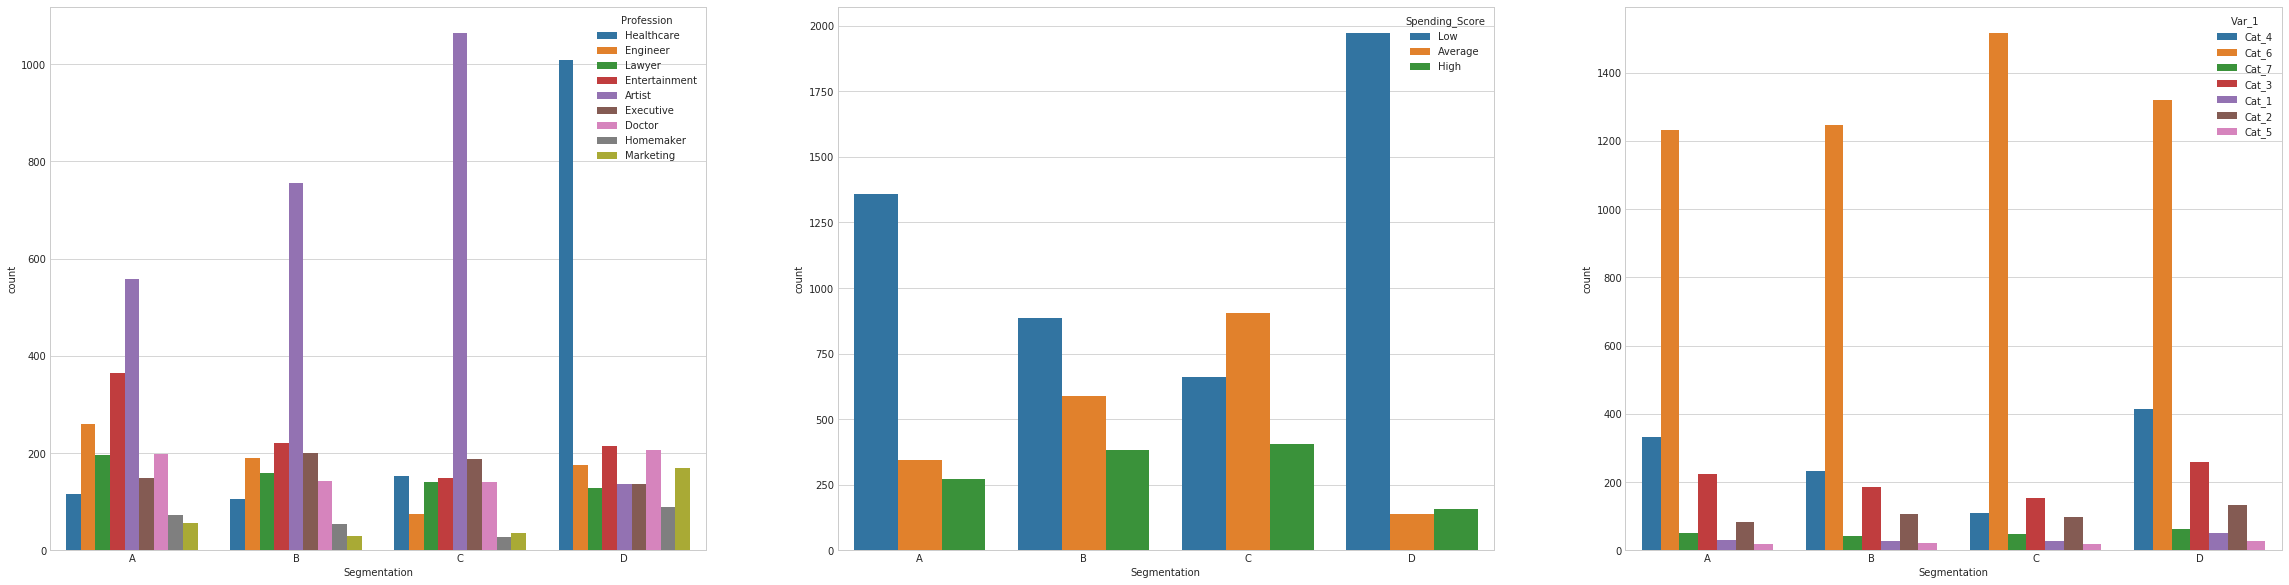

In [0]:
#multiple groups
fig, ax = plt.subplots(1,3, figsize=(40,10))
for i, variable in enumerate(["Profession","Spending_Score","Var_1"]):
    sns.countplot(x="Segmentation", data=object_col,  hue = variable,order = ['A','B','C','D'], ax = ax[i])

- Majority of segment D consumers are heathcare professionals, while majority of other 3 segments consumers are artists
    - Majority of segment A/B/D consumers have low spending score, while segment C consumer has more medium average score
    - Cat_6 dominates in all segments

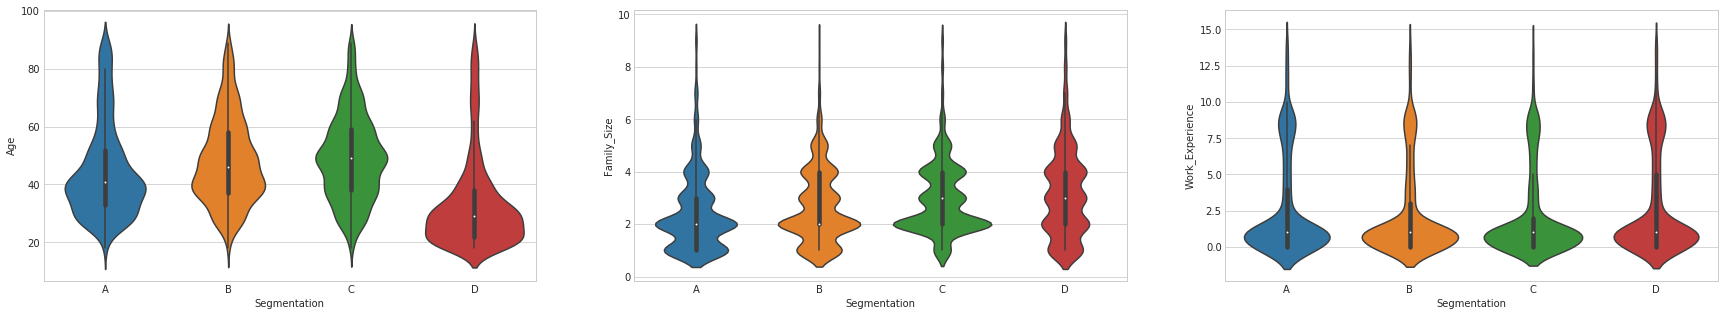

In [0]:
# Age
fig, ax = plt.subplots(1,3, figsize=(30,5))
for i, variable in enumerate(["Age","Family_Size","Work_Experience"]):
  sns.violinplot(
    x='Segmentation',
    y=variable,
    order = ["A","B","C","D"],
    data=train,ax = ax[i])

- Segment D consumer are younger than the other 3 segments
    - All segments have similar work experience distribution
    - Most consumers have family size of 2 or less. Segment D consumer tends to have larger family size than the other 3 segments

- Binning of Numerical Variables

In [0]:
train['Age_Group'] = pd.cut(train.Age,bins=[17,30,40,50,60,70,90],labels=['Young_Adult','30-40','40-50','50-60','60-70','70+'])
train['Family_Size_Group'] = pd.cut(train.Family_Size,bins=[0,2,5,10],labels=['Small','Medium','Large'])
train['Work_Experience_Group'] = pd.cut(train.Work_Experience,bins=[-1,2,5,15],labels=['Entry','Medium','Senior'])
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 14 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 8068 non-null int32 
 1 Gender 8068 non-null object 
 2 Ever_Married 8068 non-null object 
 3 Age 8068 non-null int32 
 4 Graduated 8068 non-null object 
 5 Profession 8068 non-null object 
 6 Work_Experience 8068 non-null float64 
 7 Spending_Score 8068 non-null object 
 8 Family_Size 8068 non-null float64 
 9 Var_1 8068 non-null object 
 10 Segmentation 8068 non-null object 
 11 Age_Group 8068 non-null category
 12 Family_Size_Group 8068 non-null category
 13 Work_Experience_Group 8068 non-null category
dtypes: category(3), float64(2), int32(2), object(7)
memory usage: 1.0+ MB

Requirement already satisfied: pip in /databricks/python3/lib/python3.7/site-packages (20.3.3)

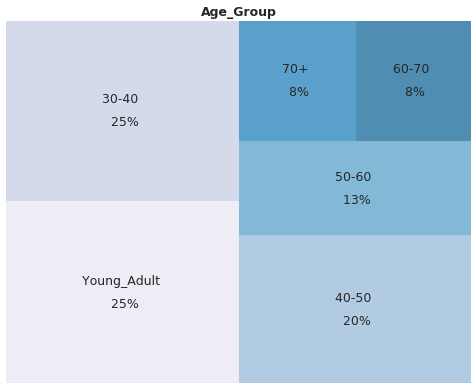

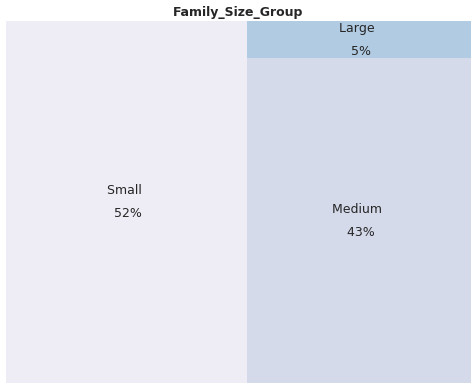

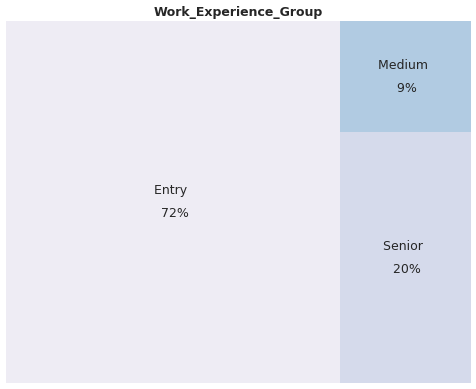

In [0]:
# Prepare Data
# !pip install squarify
!pip install --upgrade pip
#  squarify codes were inspired and adapted from this notebook (https://www.kaggle.com/ahmedatta/who-said-data-science-is-boring) 
import squarify

for i in ["Age_Group","Family_Size_Group","Work_Experience_Group"]:
    df = train[i].value_counts()
    percent = [str('{:0.0f}%'.format(i/df.values.sum()*100)) for i in df.values]
    labels = [z[0] + " \n " + z[1] for z in zip(df.index, percent)]
    sizes = df.values.tolist()
    plt.figure(figsize=(10,8), dpi= 60)
    squarify.plot(sizes=sizes, label=labels,alpha=.7,color= sns.color_palette('PuBu'), text_kwargs={'fontsize':15,'linespacing':2})
    plt.axis('off')
    plt.title(i,fontsize=15,weight='bold')
    plt.show();




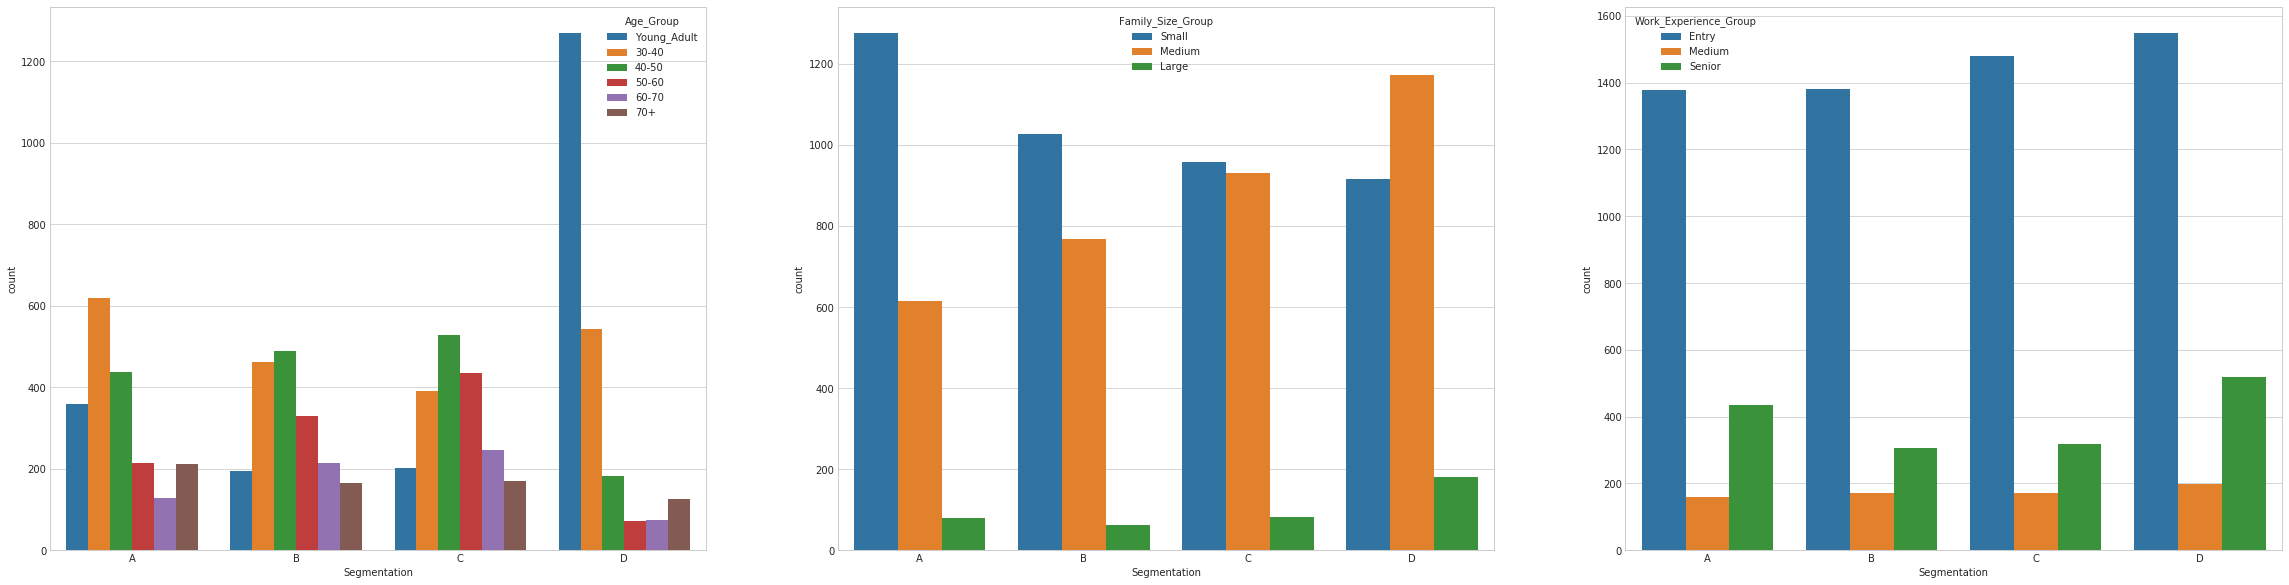

In [0]:
fig, ax = plt.subplots(1,3, figsize=(40,10))
for i, variable in enumerate(["Age_Group","Family_Size_Group","Work_Experience_Group"]):
    sns.countplot(x="Segmentation", data=train,  hue = variable,order = ['A','B','C','D'], ax = ax[i])

- Majortity of segment D customers is in the young adult group
    - Majortiy of segment D customers has medium size family, while the other three has smaller family size
    - Across all segments, majortiy of customers has entry work experience

In [0]:
test['Age_Group'] = pd.cut(test.Age,bins=[17,30,40,50,60,70,90],labels=['Young_Adult','30-40','40-50','50-60','60-70','70+'])
test['Family_Size_Group'] = pd.cut(test.Family_Size,bins=[0,2,5,10],labels=['Small','Medium','Large'])
test['Work_Experience_Group'] = pd.cut(test.Work_Experience,bins=[-1,2,5,15],labels=['Entry','Medium','Senior'])
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2626
Data columns (total 14 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 2627 non-null int32 
 1 Gender 2627 non-null object 
 2 Ever_Married 2627 non-null object 
 3 Age 2627 non-null int32 
 4 Graduated 2627 non-null object 
 5 Profession 2627 non-null object 
 6 Work_Experience 2627 non-null float64 
 7 Spending_Score 2627 non-null object 
 8 Family_Size 2627 non-null float64 
 9 Var_1 2627 non-null object 
 10 Segmentation 0 non-null object 
 11 Age_Group 2627 non-null category
 12 Family_Size_Group 2627 non-null category
 13 Work_Experience_Group 2627 non-null category
dtypes: category(3), float64(2), int32(2), object(7)
memory usage: 233.9+ KB

- Feature Engineering & ML Models

In [0]:
# coding the categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
train_1 = train.copy()
test_1 = test.copy()
train_1 = train_1.drop(['ID','Age','Work_Experience','Family_Size'],axis=1)
test_1 = test_1.drop(['ID','Age','Work_Experience','Family_Size','Segmentation'],axis=1)
train_1.info()

segmentation_map = {"Segmentation": {"A": 0, "B": 1, "C":2, "D" : 3}}
train_1 = train_1.replace(segmentation_map)
train_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Gender 8068 non-null object 
 1 Ever_Married 8068 non-null object 
 2 Graduated 8068 non-null object 
 3 Profession 8068 non-null object 
 4 Spending_Score 8068 non-null object 
 5 Var_1 8068 non-null object 
 6 Segmentation 8068 non-null object 
 7 Age_Group 8068 non-null category
 8 Family_Size_Group 8068 non-null category
 9 Work_Experience_Group 8068 non-null category
dtypes: category(3), object(7)
memory usage: 528.3+ KB
Out[271]:

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age_Group,Family_Size_Group,Work_Experience_Group
0,Male,No,No,Healthcare,Low,Cat_4,3,Young_Adult,Medium,Entry
1,Female,Yes,Yes,Engineer,Average,Cat_4,0,30-40,Medium,Entry
2,Female,Yes,Yes,Engineer,Low,Cat_6,1,60-70,Small,Entry
3,Male,Yes,Yes,Lawyer,High,Cat_6,1,60-70,Small,Entry
4,Female,Yes,Yes,Entertainment,High,Cat_6,0,30-40,Large,Entry


In [0]:
features = train_1.drop("Segmentation",1)
label = train_1["Segmentation"]

test_features = test_1

In [0]:
le = LabelEncoder()

for i in ["Gender","Ever_Married","Graduated"]:
  features[i] = le.fit_transform(features[i])
  test_features[i] = le.fit_transform(test_features[i])

In [0]:
label

Out[274]: 0 3
1 0
2 1
3 1
4 0
 ..
8063 3
8064 3
8065 3
8066 1
8067 1
Name: Segmentation, Length: 8068, dtype: int64

In [0]:
features

Out[275]:

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Age_Group,Family_Size_Group,Work_Experience_Group
0,1,0,0,Healthcare,Low,Cat_4,Young_Adult,Medium,Entry
1,0,1,1,Engineer,Average,Cat_4,30-40,Medium,Entry
2,0,1,1,Engineer,Low,Cat_6,60-70,Small,Entry
3,1,1,1,Lawyer,High,Cat_6,60-70,Small,Entry
4,0,1,1,Entertainment,High,Cat_6,30-40,Large,Entry
...,...,...,...,...,...,...,...,...,...
8063,1,0,0,Healthcare,Low,Cat_1,Young_Adult,Large,Entry
8064,1,0,0,Executive,Low,Cat_4,30-40,Medium,Medium
8065,0,0,1,Healthcare,Low,Cat_6,30-40,Small,Entry
8066,0,0,1,Healthcare,Low,Cat_6,Young_Adult,Medium,Entry


In [0]:
enc = OneHotEncoder(handle_unknown = 'ignore',sparse = False)

ct = ColumnTransformer([("enc",enc,["Profession","Spending_Score","Var_1","Age_Group","Family_Size_Group","Work_Experience_Group"])], remainder = 'passthrough')
features = ct.fit_transform(features)
test_features = ct.fit_transform(test_features)


In [0]:
features.shape # columns match

Out[277]: (8068, 34)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

In [0]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
crf = RandomForestClassifier()
crf.fit(X_train, y_train)
crf_pred_1=crf.predict(X_test)
print(confusion_matrix(y_test, crf_pred_1))
print(accuracy_score(y_test,crf_pred_1))

[[183 69 62 85]
 [ 90 113 106 45]
 [ 48 79 236 46]
 [ 80 35 24 313]]
0.523543990086741

In [0]:
# improve random forest model
rf_parameter_grid = {'n_estimators': [50,100,105,120]
                     ,'max_depth': list(np.linspace(10, 50, 8, endpoint=True))          
                     }
crf = RandomForestClassifier()
grid_crf = GridSearchCV(crf, rf_parameter_grid, cv=10)
grid_crf.fit(X_train, y_train)
print(grid_crf.best_estimator_)
crf_pred_2 = grid_crf.best_estimator_.predict(X_test)


print("Confusion_Matrix:")
print(confusion_matrix(y_test, crf_pred_2))
print("\n")

print("Accuracy_Score:")
print(accuracy_score(y_test,crf_pred_2)*100,'%')
print("\n")

print("Details:")
print(classification_report(y_test, crf_pred_2))



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
 criterion='gini', max_depth=10.0, max_features='auto',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=100,
 n_jobs=None, oob_score=False, random_state=None,
 verbose=0, warm_start=False)
Confusion_Matrix:
[[191 72 52 84]
 [ 87 108 115 44]
 [ 53 66 240 50]
 [ 85 23 8 336]]


Accuracy_Score:
54.21313506815365 %


Details:
 precision recall f1-score support

 0 0.46 0.48 0.47 399
 1 0.40 0.31 0.35 354
 2 0.58 0.59 0.58 409
 3 0.65 0.74 0.70 452

 accuracy 0.54 1614
 macro avg 0.52 0.53 0.52 1614
weighted avg 0.53 0.54 0.53 1614

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred1=knn.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))


[[192 78 43 86]
 [107 120 91 36]
 [ 67 126 178 38]
 [ 91 39 22 300]]
0.48946716232961585

In [0]:
knn_param_grid={"n_neighbors": [1,3,5,7,9,11], 
                "p": [1,2]}

grid = GridSearchCV(knn, knn_param_grid, cv=10)
grid.fit(X_train, y_train)
print(f'best accuracy score : {grid.best_score_}')
grid.best_estimator_

best accuracy score : 0.49302157582739337
Out[293]: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=None, n_neighbors=11, p=1,
 weights='uniform')

Out[294]:

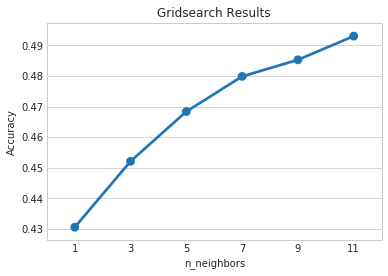

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'n_neighbors'),
 Text(0.5, 1.0, 'Gridsearch Results')]

In [0]:
p1 = grid.cv_results_['param_p']==1
sns.pointplot(x=grid.cv_results_['param_n_neighbors'][p1],
                  y=grid.cv_results_['mean_test_score'][p1]) \
       .set(xlabel='n_neighbors', ylabel='Accuracy', title='Gridsearch Results')


In [0]:
!pip install lightgbm
from lightgbm import LGBMClassifier
lgb= LGBMClassifier(learning_rate=0.1, n_estimators=250, max_depth=5,
min_child_weight=1,subsample=0.9, colsample_bytree=0.9, scale_pos_weight=3)
lgb.fit(X_train, y_train)
pred1=lgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

Requirement already satisfied: lightgbm in /databricks/python3/lib/python3.7/site-packages (3.1.1)
Requirement already satisfied: scikit-learn!=0.22.0 in /databricks/python3/lib/python3.7/site-packages (from lightgbm) (0.22.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.7/site-packages (from lightgbm) (1.18.1)
Requirement already satisfied: wheel in /databricks/python3/lib/python3.7/site-packages (from lightgbm) (0.34.2)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.7/site-packages (from lightgbm) (1.4.1)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn!=0.22.0->lightgbm) (0.14.1)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[[184 82 52 81]
 [ 94 114 105 41]
 [ 52 74 240 43]
 [ 87 30 10 325]]
0.5346964064436184

In [0]:
test_1.head()

Out[296]:

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Age_Group,Family_Size_Group,Work_Experience_Group
0,0,1,1,Engineer,Low,Cat_6,30-40,Small,Entry
1,1,1,1,Healthcare,Average,Cat_6,30-40,Medium,Senior
2,0,1,0,Executive,Low,Cat_6,60-70,Small,Entry
3,1,1,0,Executive,High,Cat_6,50-60,Small,Senior
4,0,0,0,Marketing,Low,Cat_6,Young_Adult,Medium,Entry


In [0]:
#predict
pred1=lgb.predict(test_features)
label = ["A","B","C","D"]
for i in range(len(pred1)):
  print(label[pred1[i]])


A
C
A
C
D
B
A
C
C
D
D
D
C
D
D
C
A
C
B
C
B
B
A
B
C
D
D
B
B
A
D
C
A
C
C
B
B
C
C
C
D
C
D
C
C
B
D
C
D
B
A
A
A
C
C
C
A
B
B
C
D
C
B
C
A
A
A
C
D
C
D
C
C
D
B
C
A
C
C
C
A
C
B
A
B
C
C
D
B
D
B
C
A
B
A
C
A
D
C
C
A
A
D
D
D
D
D
D
A
C
A
C
B
C
C
A
D
A
A
A
D
A
D
C
D
C
C
B
A
D
C
C
D
C
B
D
C
C
B
C
D
B
C
B
D
A
D
A
D
A
B
C
C
B
B
B
D
D
B
B
A
B
C
D
C
A
A
D
C
A
B
B
C
A
B
D
B
D
C
B
C
D
A
C
D
A
D
A
B
C
C
A
B
C
B
B
C
A
B
C
D
C
C
B
B
B
D
D
D
C
D
A
D
A
A
A
C
A
A
C
B
D
A
B
C
C
C
C
B
B
C
D
D
D
B
B
A
D
B
A
C
C
B
C
D
B
D
D
A
B
A
D
A
A
A
B
B
B
A
A
B
B
A
D
D
D
D
A
D
C
A
B
B
B
C
D
B
A
A
C
C
C
B
B
D
A
D
B
B
A
B
C
B
B
A
B
D
A
A
B
A
A
A
B
A
A
B
A
D
A
A
A
A
B
B
B
B
A
A
A
B
D
A
D
B
B
A
A
C
A
A
A
B
A
D
D
A
A
B
C
C
C
B
A
B
B
D
A
C
D
D
D
C
A
A
B
C
D
D
D
D
D
C
C
C
C
A
B
A
D
B
A
D
B
D
B
A
A
C
A
A
D
D
A
D
D
B
B
C
D
A
B
B
D
A
A
B
B
D
B
B
D
D
D
D
A
A
A
B
A
C
B
D
C
C
B
C
A
D
D
B
B
B
B
C
A
A
A
D
A
D
A
B
A
A
A
D
A
D
A
C
A
D
B
C
A
B
A
C
A
A
A
D
D
B
A
A
A
D
D
C
D
B
D
D
B
D
D
D
A
D
D
D
C
A
B
D
D
A
B
A
C
C
C
B
A
D
D
C
D
D
A
D
D
A
D
D
D
C
A
D
D
D
A
A
C
C
B
D
B
D
D
A
D
C
A
A
D
A
A
A
A
D
A
A
D
C
D
B
B
D
A
C
C
C
A
C
B
A
B
A
A
C
C
D
B
B
D
A
D
B
A
A
B
B
B
B
B
D
A
B
D
A
A
A
D
D
A
B
B
A
A
C
D
B
D
D
A
C
C
D
D
A
D
C
A
D
A
A
B
A
C
D
C
D
A
D
A
D
C
C
A
A
D
B
D
A
B
B
D
D
C
D
A
B
C
D
C
B
A
D
A
D
D
B
B
D
D
D
B
C
D
C
C
B
A
B
D
D
B
A
A
C
D
D
D
D
D
D
D
B
C
A
D
A
A
D
B
A
D
D
B
D
A
D
D
D
D
A
B
D
A
D
B
D
D
D
D
B
D
B
A
D
A
D
D
D
D
D
B
D
B
C
A
B
D
D
C
D
A
D
D
D
D
A
C
D
D
D
C
C
C
C
C
C
A
B
C
C
B
D
D
D
D
D
A
D
D
C
B
D
C
D
D
D
D
C
A
C
A
C
B
C
C
C
B
D
A
A
D
C
A
C
B
C
C
C
B
D
B
A
B
D
B
C
C
B
A
D
D
B
D
D
D
A
C
C
C
C
C
D
C
A
B
D
A
A
C
C
C
C
A
D
C
A
C
C
C
D
C
D
C
A
D
D
B
D
B
A
D
C
C
C
C
A
A
A
C
A
D
C
A
C
B
A
C
C
D
C
C
C
A
A
B
C
D
C
B
C
D
D
B
D
A
B
D
B
D
D
C
D
D
B
C
B
D
D
C
C
B
D
C
D
C
A
D
B
C
D
A
C
A
C
B
B
A
A
A
D
B
A
C
D
C
B
D
C
A
D
D
B
B
D
A
A
D
C
D
C
A
C
A
D
A
D
C
C
B
D
D
B
A
A
C
B
C
B
C
B
D
D
B
D
C
B
D
D
A
A
A
A
D
C
D
C
A
A
C
A
D
B
B
B
B
B
B
A
B
A
D
B
D
A
A
A
B
A
B
A
D
D
D
A
B
D
A
A
A
D
D
D
A
A
D
A
A
A
B
D
B
C
A
D
C
C
D
D
D
B
B
A
B
D
D
B
C
A
A
D
C
C
A
A
B
C
B
A
C
A
D
A
A
C
C
B
A
D
D
A
C
C
C
A
D
A
A
D
D
A
B
C
C
D
D
D
D
D
D
D
D
D
D
C
A
A
A
D
A
C
C
B
C
D
D
B
D
D
D
A
B
C
C
B
A
D
C
B
C
B
D
D
C
C
A
D
C
A
A
B
D
A
D
D
A
A
B
D
D
D
D
B
A
A
A
D
B
A
A
A
B
C
C
A
D
D
C
B
A
B
C
C
D
D
D
C
B
D
C
B
B
A
B
B
D
D
D
D
D
D
D
C
D
C
B
B
B
A
D
A
D
B
A
A
C
A
A
D
A
A
B
D
B
C
D
D
D
D
D
A
A
D
C
B
C
A
D
D
B
C
C
A
C
B
A
A
D
A
A
C
A
B
D
C
C
B
B
C
D
A
C
C
D
B
B
C
B
C
A
B
A
A
D
C
D
C
D
A
A
D
D
D
D
B
A
A
D
A
B
D
C
C
B
D
A
D
A
D
A
A
B
C
B
A
A
C
D
C
B
B
C
C
D
B
A
B
A
C
D
C
C
A
D
A
B
B
A
B
C
A
D
B
B
D
D
A
B
B
A
C
D
C
B
D
A
C
B
D
D
C
A
C
C
A
B
A
B
D
D
B
C
B
B
A
B
D
D
D
A
B
A
D
D
A
B
D
D
B
B
B
A
A
C
A
D
B
D
B
D
D
D
A
C
C
B
A
D
C
C
C
C
B
B
C
C
D
B
D
D
D
B
D
D
A
B
B
B
B
A
A
D
B
B
B
D
C
D
A
D
C
A
B
D
D
A
C
C
C
D
D
D
D
D
D
C
D
C
A
B
D
D
C
A
B
D
D
D
D
B
A
B
C
D
D
C
A
D
B
D
B
A
D
D
B
D
A
C
D
D
A
D
D
A
A
C
C
D
D
B
B
C
C
B
A
D
C
A
D
A
D
C
D
A
B
B
D
B
D
C
D
B
B
A
A
C
B
B
D
B
D
B
C
C
B
C
C
A
B
D
A
A
D
D
D
B
D
C
C
D
A
D
B
B
A
D
A
D
A
C
C
A
A
C
B
D
D
C
C
D
D
A
D
D
D
D
D
D
D
A
B
D
D
D
B
C
B
A
D
B
B
A
B
A
D
D
C
D
B
C
C
A
D
A
B
B
B
D
C
D
C
C
A
C
A
B
C
D
B
C
B
C
B
C
A
C
B
C
B
A
C
A
C
D
C
C
C
D
C
C
B
A
A
A
A
C
C
C
A
C
C
D
C
D
D
C
D
A
A
B
D
C
D
C
B
C
B
C
C
C
C
A
C
C
B
D
D
A
D
A
B
B
A
C
A
C
C
B
B
C
B
C
D
A
C
C
C
D
D
D
D
A
C
B
B
B
B
B
C
C
C
A
D
A
A
B
D
A
D
D
D
A
D
B
B
A
A
D
A
C
C
C
B
C
B
D
D
A
D
A
A
A
B
B
D
D
A
D
D
D
D
A
D
A
D
A
C
D
D
B
A
B
A
A
D
D
B
A
B
D
D
C
D
A
B
D
A
B
D
A
A
A
D
A
D
A
A
D
B
B
C
A
D
D
A
D
D
D
D
D
D
B
D
D
A
D
A
D
D
A
A
C
B
A
A
A
B
D
D
B
B
C
B
A
D
A
D
A
B
D
A
A
A
A
A
B
D
D
A
B
A
C
C
B
C
B
A
C
B
D
C
C
D
C
C
B
B
C
B
A
C
C
C
A
A
D
C
C
A
C
B
C
B
B
A
C
B
B
C
D
B
C
A
C
B
C
D
D
A
A
C
A
C
D
C
C
D
C
D
A
C
D
C
C
D
A
C
C
D
D
D
B
D
C
A
C
C
B
B
D
D
D
D
D
D
A
A
A
C
C
D
C
A
C
C
D
D
A
A
B
C
C
C
B
C
C
D
C
C
B
A
B
B
A
D
C
C
C
D
A
B
D
D
A
D
C
A
B
A
C
A
A
D
C
C
D
B
D
B
B
B
D
D
A
C
C
D
B
A
C
C
B
D
B
B
B
C
D
D
C
C
C
A
B
A
C
A
D
D
C
A
C
D
C
B
A
D
D
D
B
B
A
B
C
C
A
D
A
D
C
A
B
C
D
B
D
D
C
B
D
C
B
D
D
A
A
A
D
D
C
D
D
B
A
B
C
C
D
A
A
D
D
A
A
B
D
A
C
C
C
A
A
D
A
D
A
A
D
D
D
C
A
